In [1]:
# import julia
# julia.install()

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# import pyMAGEMINcalc as MM
import PetThermoTools as M
import pickle
# MM.__version__

import sys
sys.path.append(r'H:\My Drive\2022\GitHub\PetThermoTools\MELTS')

In [59]:
comp = {'SiO2': 49.84,
       'TiO2': 0.65,
       'Al2O3': 8.02,
       'FeOt': 7.80,
       'MgO': 13.55,
       'CaO': 17.64,
       'Na2O': 1.42,
       'K2O': 0.0,
       'Cr2O3': 0.025,
       'H2O': 0.0,
       'Fe3Fet': 0.252}

In [78]:
Results = M.AdiabaticDecompressionMelting(Model = "Holland", bulk = comp, Fe3Fet = 0.26,
                                          Tp_C = 1360, P_start_bar = 56000, P_end_bar = 30000, dp_bar = 200)

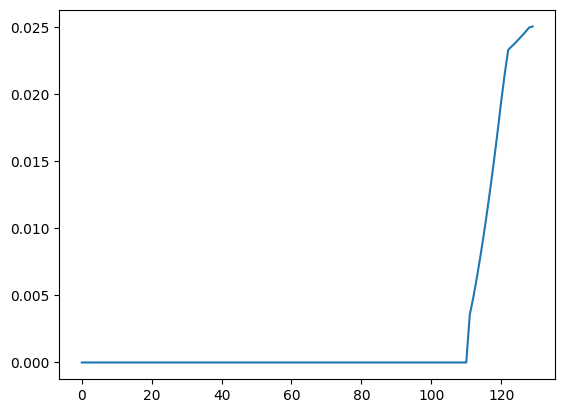

In [79]:
f, a = plt.subplots(1,1)
a.plot(Results['Mass']['liq'])

In [80]:
with open('594_Fe3Fet_026_Tp_1360.pkl', 'wb') as f:
    pickle.dump(Results,f)

In [81]:
with open('594_Fe3Fet_026_Tp_1360.pkl', 'rb') as f:
    Results = pickle.load(f)

In [82]:
import FeIsotopeCalc as dfe
delta56Fe_offset = dfe.calc_56Fe54Fe_all_phases(Results["Conditions"], 
                                                   Results["Mass"], 
                                                   Results)

h:\my drive\2022\github\feisotopecalc\src\FeIsotopeCalc\main.py:79: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Frac[s].loc[np.where(np.isnan(Frac[s]))] = 0
h:\my drive\2022\github\feisotopecalc\src\FeIsotopeCalc\main.py:79: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Frac[s].loc[np.where(np.isnan(Frac[s]))] = 0
h:\my drive\2022\github\feisotopecalc\src\FeIsotopeCalc\main.py:79: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Frac[s]

In [83]:
import TraceElementEngine as TE

In [84]:
C_melt = TE.accum_frac_melt(Results['Mass'].copy())

In [85]:
Fe_results = pd.concat([Results['Conditions'], Results['Mass'].add_suffix('_Mass'), delta56Fe_offset.add_suffix('_$\Delta ^{56}$Fe'), C_melt], axis = 1)

In [86]:
Fe_results.to_excel('594_Fe3Fet_026_Tp_1360.xlsx')